<a href="https://colab.research.google.com/github/yunpengliDataScience/Skin_Cancer_ML_DL/blob/main/Skin%20Cancer%20Classification%20prediction_Machien%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
from imageio import imread
from PIL import Image
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn import preprocessing

**Mout google drive:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


**Create project root path:**

In [3]:
project_root_path_string = '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/'

print("project_root_path_string:", project_root_path_string)

project_root_path_string: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/


In [4]:
sys.path.append(project_root_path_string)

sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/']

**Get the root data directory:**

In [5]:
data_root_path = os.path.join(project_root_path_string, 'data') 

print("data_root_path:", data_root_path)

data_root_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data


**Get the raw image data directory:**

In [6]:
raw_data_path =  os.path.join(data_root_path, 'raw_image_data') 
print("raw_data_path:", raw_data_path)

raw_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data


**Get the tabular data path:**

In [7]:
tabular_data_path = os.path.join(data_root_path, 'tabular_data') 

print("tabular_data_path:", tabular_data_path)

tabular_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/tabular_data


**Read metadata into a panda data frame:**

In [8]:
metaData_pd = pd.read_csv(os.path.join(tabular_data_path, 'metadata.csv'))

In [9]:
metaData_pd.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


**Summarize NaN values:**

In [10]:
count_nan_in_df = metaData_pd.isnull().sum()
print (count_nan_in_df)

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64


**Visualize skin leison category size:**

Text(0.5, 1.02, 'Number of image by cancer diagnosis type')

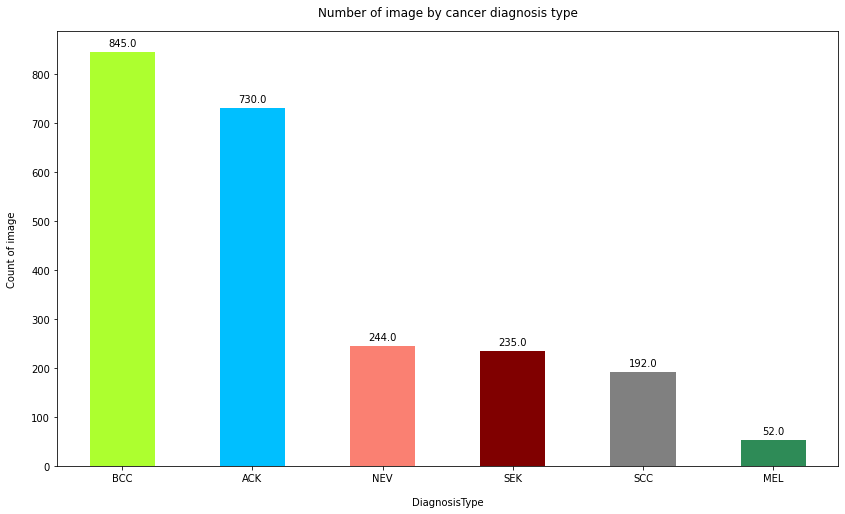

In [11]:
colors = ['#ADFF2F','#00BFFF','#FA8072','#800000','#808080','#2E8B57']
plt.figure(figsize=(8, 6))
splot=metaData_pd['diagnostic'].value_counts().plot(kind='bar', figsize=(14, 8), rot=0, color=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("DiagnosisType", labelpad=14)
plt.ylabel("Count of image", labelpad=14)

plt.title("Number of image by cancer diagnosis type", y=1.02)




In [12]:
##The dataset contains 1342 images whith true biopsy
metaData_pd.groupby('biopsed').size()

biopsed
False     956
True     1342
dtype: int64

In [13]:
## 58.3% of the images have true biopse

(metaData_pd.groupby('biopsed').size()/metaData_pd['biopsed'].count())*100

biopsed
False    41.601393
True     58.398607
dtype: float64

In [14]:
 le = preprocessing.LabelEncoder()
###Encode diagnostic column to have numerical values
# metaData_pd['target']=le.fit_transform(metaData_pd['diagnostic'])
## Encode dataset to have numerical values
# metaData_pd['smoke']=le.fit_transform(metaData_pd['smoke'])
# metaData_pd['drink']=le.fit_transform(metaData_pd['drink'])
# metaData_pd['region']=le.fit_transform(metaData_pd['region'])
# metaData_pd['itch']=le.fit_transform(metaData_pd['itch'])
# metaData_pd['grew']=le.fit_transform(metaData_pd['grew'])
# metaData_pd['hurt']=le.fit_transform(metaData_pd['hurt'])
# metaData_pd['changed']=le.fit_transform(metaData_pd['changed'])
# metaData_pd['bleed']=le.fit_transform(metaData_pd['bleed'])
# metaData_pd['elevation']=le.fit_transform(metaData_pd['elevation'])
# metaData_pd['biopsed']=le.fit_transform(metaData_pd['biopsed'])




In [15]:
pip install dython

In [16]:
### remove the id columns as since it is not important to field to train a model
metaData_pd = metaData_pd.drop(columns=['patient_id','img_id','lesion_id'])

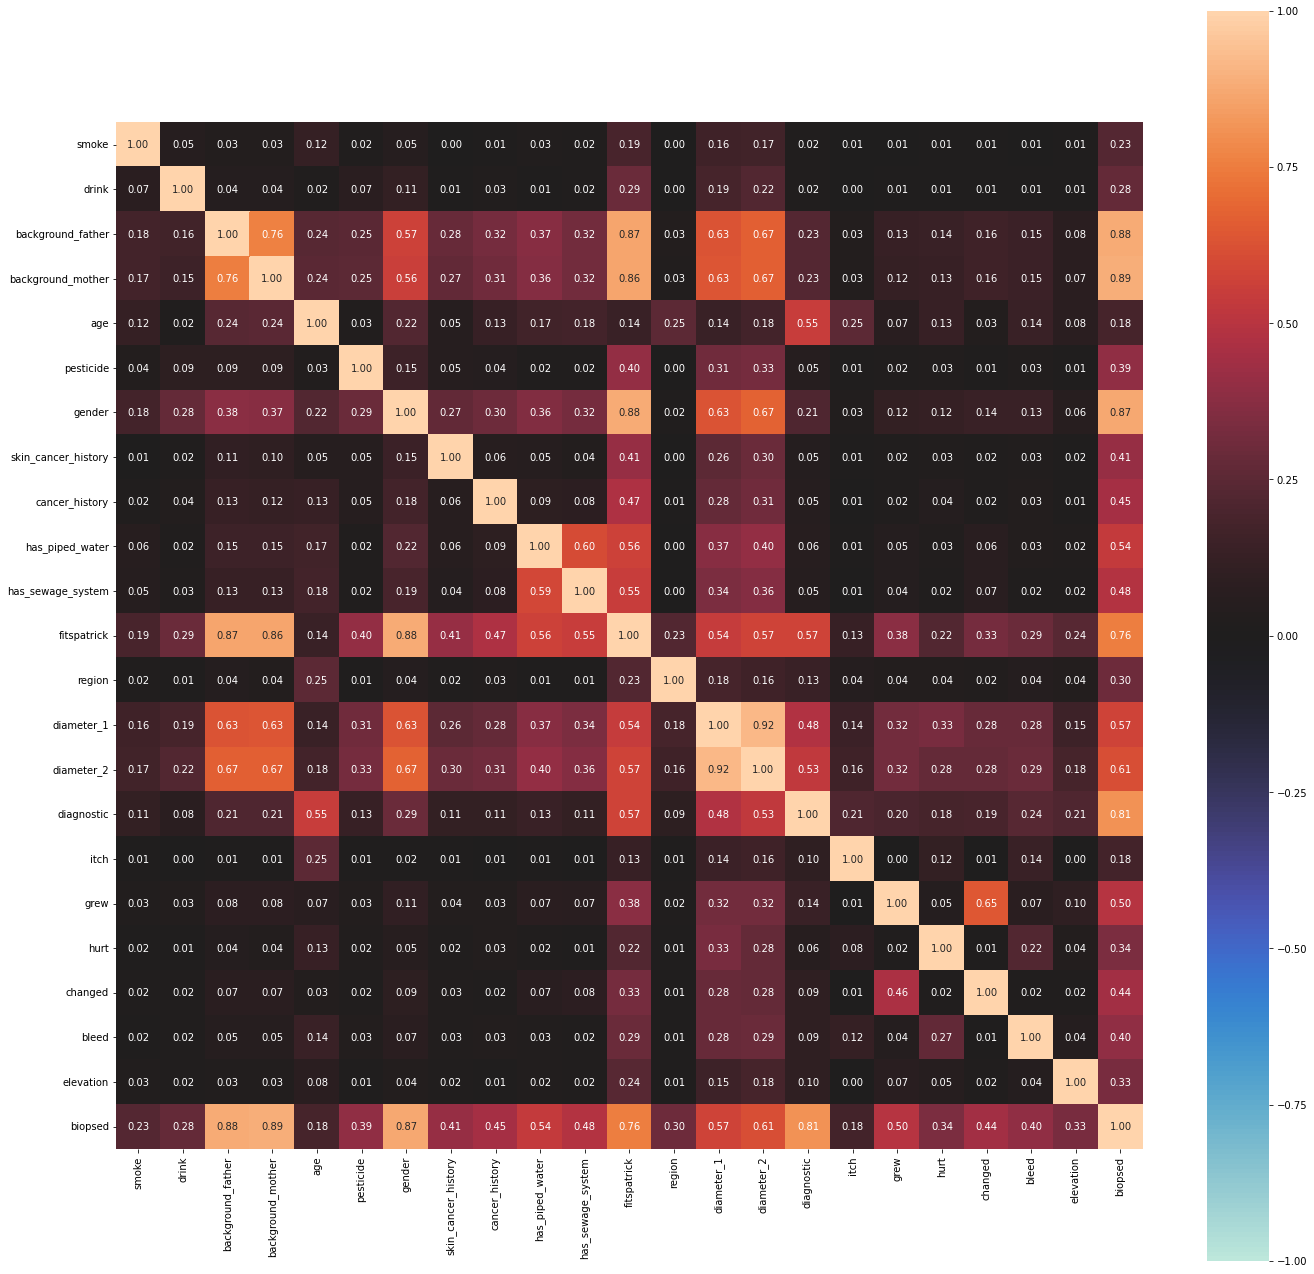

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f34b7f31ad0>,
 'corr':                         smoke     drink  ...  elevation   biopsed
 smoke                1.000000  0.047988  ...   0.012023  0.233957
 drink                0.070920  1.000000  ...   0.013130  0.279479
 background_father    0.175912  0.164739  ...   0.076435  0.882316
 background_mother    0.173884  0.152216  ...   0.070595  0.886191
 age                  0.124379  0.022552  ...   0.075356  0.181797
 pesticide            0.038114  0.093504  ...   0.009954  0.391303
 gender               0.175981  0.279381  ...   0.062442  0.869192
 skin_cancer_history  0.005986  0.018124  ...   0.015425  0.406600
 cancer_history       0.018919  0.038483  ...   0.013793  0.449624
 has_piped_water      0.058185  0.021356  ...   0.024273  0.536637
 has_sewage_system    0.047004  0.026851  ...   0.022138  0.484994
 fitspatrick          0.190476  0.294157  ...   0.240616  0.756666
 region               0.016836  0.009760  ...   0.03754

In [17]:
##Correlation matrix£#‹
from dython.nominal import associations
num_cols = len(metaData_pd.columns)
associations(metaData_pd, nom_nom_assoc='theil', figsize=(num_cols, num_cols))

Creating a new Category (unknown) for missing values.Advantage: Simple and easy to implement for categorical variables/columns and preserves the variance. 34% of missing values from in 13 columns.
Doesn’t give good results when missing data is a high percentage of the data.

In [18]:
# categorical features check
cat =metaData_pd.select_dtypes(include='O').keys()
cat

Index(['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'diagnostic', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation'],
      dtype='object')

In [19]:
# replace the missing for data categorical variable based on the mode function. most frequent value.
cat_columns = metaData_pd[['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation','biopsed']]
# cat_columns=cat_columns.fillna(cat_columns.columns.mode())
# cat_columns
for column in cat_columns.columns:
    cat_columns[column].fillna(cat_columns[column].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smoke                2298 non-null   bool  
 1   drink                2298 non-null   bool  
 2   background_father    2298 non-null   object
 3   background_mother    2298 non-null   object
 4   pesticide            2298 non-null   bool  
 5   gender               2298 non-null   object
 6   skin_cancer_history  2298 non-null   bool  
 7   cancer_history       2298 non-null   bool  
 8   has_piped_water      2298 non-null   bool  
 9   has_sewage_system    2298 non-null   bool  
 10  region               2298 non-null   object
 11  itch                 2298 non-null   object
 12  grew                 2298 non-null   object
 13  hurt                 2298 non-null   object
 14  changed              2298 non-null   object
 15  bleed                2298 non-null   object
 16  elevat

In [21]:
#label encode the categorical columns
metaData_le=pd.get_dummies(cat_columns, columns=['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation','biopsed'])
#adding the target class
metaData_le['target']=le.fit_transform(metaData_pd['diagnostic'])

In [22]:
metaData_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   smoke_False                    2298 non-null   uint8
 1   smoke_True                     2298 non-null   uint8
 2   drink_False                    2298 non-null   uint8
 3   drink_True                     2298 non-null   uint8
 4   background_father_AUSTRIA      2298 non-null   uint8
 5   background_father_BRASIL       2298 non-null   uint8
 6   background_father_BRAZIL       2298 non-null   uint8
 7   background_father_CZECH        2298 non-null   uint8
 8   background_father_GERMANY      2298 non-null   uint8
 9   background_father_ISRAEL       2298 non-null   uint8
 10  background_father_ITALY        2298 non-null   uint8
 11  background_father_NETHERLANDS  2298 non-null   uint8
 12  background_father_POLAND       2298 non-null   uint8
 13  background_father_

In [23]:
le.classes_

array(['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'], dtype=object)

In [24]:
##numeric features impute mean values for nan

#Taking care of Missing data
col=metaData_pd[['age','fitspatrick','diameter_1','diameter_2']]
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(col)
###merge the numeric fields to the categorical fields
metaData_le[['age','fitspatrick','diameter_1','diameter_2']]= imputer.transform(col)


### drop the diagnostic field as we replaced it with target

# metaData_le = metaData_le.drop(columns=['diagnostic'])

In [25]:
metaData_le.head(100)

,smoke_False,smoke_True,drink_False,drink_True,background_father_AUSTRIA,background_father_BRASIL,background_father_BRAZIL,background_father_CZECH,background_father_GERMANY,background_father_ISRAEL,background_father_ITALY,background_father_NETHERLANDS,background_father_POLAND,background_father_POMERANIA,background_father_PORTUGAL,background_father_SPAIN,background_father_UNK,background_mother_BRAZIL,background_mother_FRANCE,background_mother_GERMANY,background_mother_ITALY,background_mother_NETHERLANDS,background_mother_NORWAY,background_mother_POLAND,background_mother_POMERANIA,background_mother_PORTUGAL,background_mother_SPAIN,background_mother_UNK,pesticide_False,pesticide_True,gender_FEMALE,gender_MALE,skin_cancer_history_False,skin_cancer_history_True,cancer_history_False,cancer_history_True,has_piped_water_False,has_piped_water_True,has_sewage_system_False,has_sewage_system_True,region_ABDOMEN,region_ARM,region_BACK,region_CHEST,region_EAR,region_FACE,region_FOOT,region_FOREARM,region_HAND,region_LIP,region_NECK,region_NOSE,region_SCALP,region_THIGH,itch_False,itch_True,itch_UNK,grew_False,grew_True,grew_UNK,hurt_False,hurt_True,hurt_UNK,changed_False,changed_True,changed_UNK,bleed_False,bleed_True,bleed_UNK,elevation_False,elevation_True,elevation_UNK,biopsed_False,biopsed_True,target,age,fitspatrick,diameter_1,diameter_2
0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,3,8.0,2.26573,11.897055,8.852209
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,55.0,3.00000,6.000000,5.000000
2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,77.0,2.26573,11.897055,8.852209
3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,75.0,2.26573,11.897055,8.852209
4,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,79.0,1.00000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,75.0,2.00000,10.000000,10.000000
96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,80.0,2.00000,12.000000,10.000000
97,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,56.0,2.26573,11.897055,8.852209
98,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,66.0,1.00000,10.000000,5.000000


In [26]:
### no NAN values
metaData_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   smoke_False                    2298 non-null   uint8  
 1   smoke_True                     2298 non-null   uint8  
 2   drink_False                    2298 non-null   uint8  
 3   drink_True                     2298 non-null   uint8  
 4   background_father_AUSTRIA      2298 non-null   uint8  
 5   background_father_BRASIL       2298 non-null   uint8  
 6   background_father_BRAZIL       2298 non-null   uint8  
 7   background_father_CZECH        2298 non-null   uint8  
 8   background_father_GERMANY      2298 non-null   uint8  
 9   background_father_ISRAEL       2298 non-null   uint8  
 10  background_father_ITALY        2298 non-null   uint8  
 11  background_father_NETHERLANDS  2298 non-null   uint8  
 12  background_father_POLAND       2298 non-null   u

In [27]:
metaData_le.shape

(2298, 79)

In [28]:
# Normalize data
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(metaData_le)
print(metaData_le)

      smoke_False  smoke_True  drink_False  ...  fitspatrick  diameter_1  diameter_2
0               1           0            1  ...      2.26573   11.897055    8.852209
1               1           0            1  ...      3.00000    6.000000    5.000000
2               1           0            1  ...      2.26573   11.897055    8.852209
3               1           0            1  ...      2.26573   11.897055    8.852209
4               1           0            0  ...      1.00000    5.000000    5.000000
...           ...         ...          ...  ...          ...         ...         ...
2293            1           0            1  ...      2.26573   11.897055    8.852209
2294            1           0            1  ...      3.00000   13.000000   12.000000
2295            1           0            1  ...      2.26573   11.897055    8.852209
2296            1           0            1  ...      3.00000    5.000000    4.000000
2297            1           0            1  ...      2.26573   11

In [29]:
X = metaData_le.drop(columns=['target'])
Y = metaData_le[['target']]


In [30]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [31]:
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import scale

In [32]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, Y_train.values.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
score = sgd_clf.score(X_test, Y_test)
print("Test score: ", score) 
score = sgd_clf.score(X_train, Y_train)
print("Training score: ", score) 

Test score:  0.7304347826086957
Training score:  0.7127312295973884


In [34]:
Y_pred = sgd_clf.predict(X_test)
y_unique = Y_test['target'].unique()
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
# cm = multilabel_confusion_matrix(Y_test, Y_pred, labels = y_unique)
# cm

[[112  28   0  10   1   1]
 [  0 162   0   0   0   0]
 [  0  14   0   1   0   0]
 [  1   6   0  49   0   0]
 [  1  26   0   1   0   0]
 [ 12   5   0  17   0  13]]


In [35]:
le.classes_

array(['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'], dtype=object)

In [36]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(Y_test, Y_pred, labels = y_unique)
mcm


array([[[445,   0],
        [ 15,   0]],

       [[219,  79],
        [  0, 162]],

       [[375,  29],
        [  7,  49]],

       [[294,  14],
        [ 40, 112]],

       [[412,   1],
        [ 34,  13]],

       [[431,   1],
        [ 28,   0]]])

In [37]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       152
           1       0.67      1.00      0.80       162
           2       0.00      0.00      0.00        15
           3       0.63      0.88      0.73        56
           4       0.00      0.00      0.00        28
           5       0.93      0.28      0.43        47

    accuracy                           0.73       460
   macro avg       0.52      0.48      0.46       460
weighted avg       0.70      0.73      0.68       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovr_clf = OneVsRestClassifier(SGDClassifier())

In [39]:
ovo_clf.fit(X_train, Y_train.values.ravel())
ovo_pred=ovo_clf.predict(X_test)

In [40]:
OVO_score = ovo_clf.score(X_test, Y_test)
print("Test score: ", OVO_score) 

Test score:  0.6086956521739131


In [41]:
cr = classification_report(Y_test, ovo_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.46      0.62       152
           1       0.75      0.75      0.75       162
           2       1.00      0.27      0.42        15
           3       1.00      0.54      0.70        56
           4       0.17      0.46      0.25        28
           5       0.38      0.89      0.53        47

    accuracy                           0.61       460
   macro avg       0.70      0.56      0.54       460
weighted avg       0.77      0.61      0.63       460



In [42]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
Y_pred_rf=rf_clf.predict_proba(X_test)

In [44]:
rf_trainScore=rf_clf.score(X_train,Y_train)
print('rf_trainscore is :',rf_trainScore)
rf_testScore=rf_clf.score(X_test,Y_test)
print('rf_testscore is :',rf_testScore)

rf_trainscore is : 0.9951033732317737
rf_testscore is : 0.8478260869565217


In [45]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import confusion_matrix
# fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_rf,)

# lw=2
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.plot(fpr,tpr,format('red'))
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])

# plt.title("ROC Skin Cancer classification ")
# plt.xlabel("False Positive")
# plt.ylabel("True Positive")

# plt.legend(target,loc="lower right")
# plt.grid(True)
# plt.show()

In [54]:
feature_names= X.columns

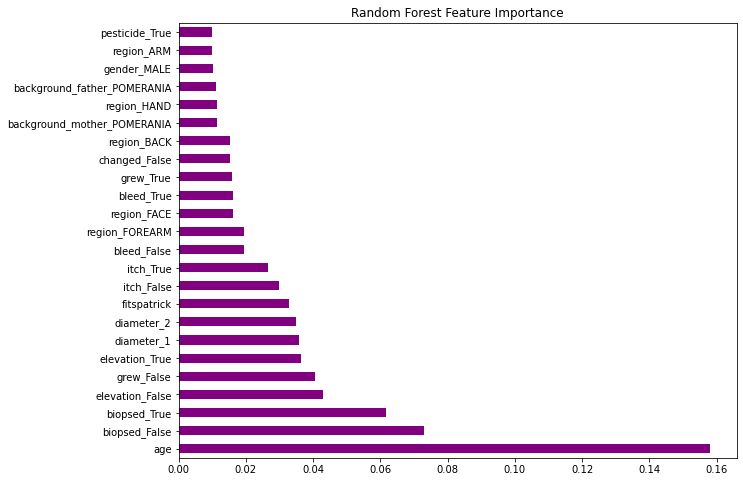

In [55]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=feature_names)
feat_importances.nlargest(24).plot(kind='barh',title='Random Forest Feature Importance',color='purple',figsize=(10, 8))

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,Y_train, cv=3,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.65579119, 0.69004894, 0.67156863])

In [50]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
x_trainScale = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,x_trainScale,Y_train, cv=3 ,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.71125612, 0.72430669, 0.71895425])

In [51]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_knn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.691304347826087

In [52]:
# decision tree classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
dt_clf = DecisionTreeClassifier()
# fit the model
dt_clf.fit(X_train, Y_train)
dt_Testscore=dt_clf.score(X_train,Y_train)
dt_Trainscore=dt_clf.score(X_test,Y_test)
print('DT test score',dt_Trainscore)
print('DT test score',dt_Testscore)

DT test score 0.7652173913043478
DT test score 0.9951033732317737


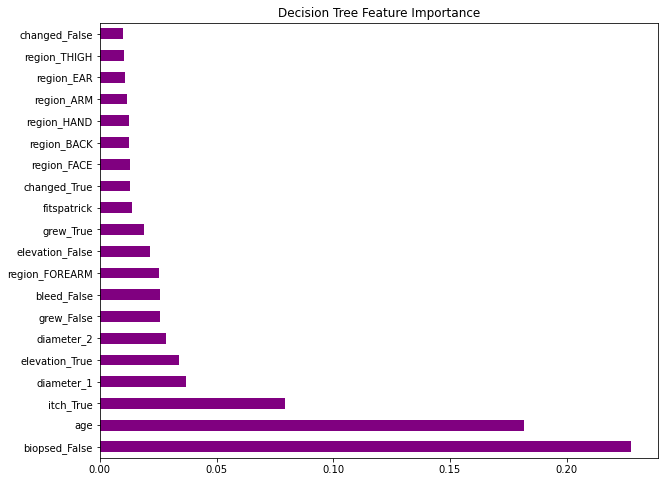

In [56]:


# get importance
importance = dt_clf.feature_importances_
# summarize feature importance
feature_importances = pd.Series(dt_clf.feature_importances_ , index=feature_names)
feature_importances.nlargest(20).plot(kind='barh',title='Decision Tree Feature Importance',color='purple',figsize=(10, 8))

In [57]:
#!/usr/bin/env python
# coding: utf-8

# In[168]:


import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm

# # Stepwise regression for MGUH



#### set X and Y from the dataframe
x2 = metaData_le.drop(columns=['target'])

y2 = metaData_le[['target']]



def get_stats():
    results = sm.OLS(y2, x2).fit()
    print(results.summary())
get_stats()


# # Stepwise regression Foraward and backward


def forward_regression(X, Y,
                       threshold_in
                      ):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
    
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            
            print('Included variables  {:30} with p-value {:.6}'.format(best_feature,format( best_pval,'.4f')))

        if not changed:
            break

    return included


forward_regression(X=x2,Y=y2,threshold_in=0.05)



def backward_regression(X, Y,
                           threshold_out
                           ):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        
        if worst_pval > threshold_out:
            #print(worst_pval)
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print('Removed variable {:30} with p-value {:.6}'.format(worst_feature, format(worst_pval, '.4f')))
        if not changed:
            break
    return included

backward_regression(X=x2,Y=y2,threshold_out=.05)








/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     16.38
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          5.83e-135
Time:                        22:22:25   Log-Likelihood:                -4033.5
No. Observations:                2298   AIC:                             8189.
Df Residuals:                    2237   BIC:                             8539.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
smoke_False   

['background_father_BRAZIL',
 'background_father_NETHERLANDS',
 'pesticide_False',
 'region_ABDOMEN',
 'region_BACK',
 'region_EAR',
 'region_FOOT',
 'region_FOREARM',
 'region_HAND',
 'region_NOSE',
 'region_THIGH',
 'itch_True',
 'grew_True',
 'changed_UNK',
 'bleed_False',
 'elevation_False',
 'biopsed_False',
 'age']